<a href="https://colab.research.google.com/github/SergioPGJunior/Detectar_Arritmia/blob/master/mit_bih_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIBLIOTECAS E FUNCOES

In [ ]:
# ! pip uninstall matplotlib
# ! pip install matplotlib==3.1.3
! pip install wfdb


In [ ]:
import pandas as pd
import numpy as np
import wfdb
import joblib

In [ ]:
def load_ecg(file):
    # Leitura e armazenamento dos dados
    record = wfdb.rdrecord(file)

    # Leitura e armazenamento das anotações
    annotation = wfdb.rdann(file, "atr")

    #Extrai os sinais
    p_signal = record.p_signal

    #Verifica se a frequência é 360
    assert record.fs == 360, "Frequência de amostragem não é 360"

    #Extrai os símbolos e anotações
    atr_sym = annotation.symbol
    atr_sample = annotation.sample

    return p_signal, atr_sym, atr_sample

In [ ]:
def build_XY(p_signal, df_ann, num_cols, abnormal, num_sec, fs):
  # this function builds the X,Y matrices for each beat
  # it also returns the original symbols for Y

  num_rows = len(df_ann)
  X = np.zeros((num_rows, num_cols))
  Y = np.zeros((num_rows, 1))
  sym = []

  # keep track of rows
  max_row = 0
  for atr_sample, atr_sym in zip(df_ann.atr_sample.values, df_ann.atr_sym.values):
      left = max([0, (atr_sample - num_sec * fs)])
      right = min([len(p_signal), (atr_sample + num_sec * fs)])
      x = p_signal[left: right]
      if len(x) == num_cols:
          X[max_row, :] = x
          Y[max_row, :] = int(atr_sym in abnormal)
          sym.append(atr_sym)
          max_row += 1
  X = X[:max_row, :]
  Y = Y[:max_row, :]
  return X, Y, sym

# IMAGENS

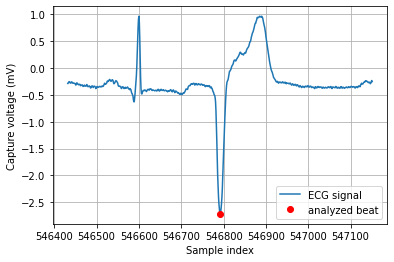

[546792]
[2044, 66792, 74986, 99579, 128085, 170719, 279576, 305709, 307745, 312825, 317785, 319223, 346804, 351481, 377081, 397335, 421994, 422818, 433841, 436149, 442623, 444705, 454651, 458168, 496712, 520982, 562812, 566259, 567379, 574429, 579448, 593068, 629171]
[77, 370, 662, 946, 1231, 1515, 1809, 2402, 2706, 2998, 3282, 3560, 3862, 4170, 4466, 4764, 5060, 5346, 5633, 5918, 6214, 6527, 6823, 7106, 7391, 7670, 7953, 8245, 8539, 8837, 9141, 9431, 9710, 9998, 10282, 10591, 10894, 11191, 11480, 11781, 12066, 12350, 12645, 12949, 13266, 13562, 13842, 14131, 14423, 14710, 15011, 15310, 15607, 15899, 16183, 16464, 16755, 17058, 17358, 17657, 17947, 18227, 18514, 18795, 19080, 19388, 19693, 19989, 20271, 20554, 20837, 21131, 21423, 21729, 22029, 22321, 22603, 22881, 23164, 23453, 23756, 24053, 24345, 24625, 24913, 25197, 25485, 25779, 26088, 26387, 26670, 26952, 27237, 27536, 27833, 28132, 28431, 28727, 29014, 29294, 29580, 29873, 30182, 30487, 30779, 31065, 31348, 31635, 31927, 32224,

In [ ]:
import matplotlib.pyplot as plt

p_signal, atr_sym, atr_sample = load_ecg("/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/100")
abnormal = ['V', 'A','N']
ant = pd.DataFrame({'atr_sym':atr_sym,'atr_sample': atr_sample})

sampleA = []
sampleV = []
sampleN= []
for id, sym, sample in ant.itertuples():
  if sym == 'N':
    sampleN.append(sample)
  elif sym == 'A':
    sampleA.append(sample)
  elif sym == 'V':
    sampleV.append(sample)

#Print do batimento com PVC
ecg = p_signal[:,0]

x = np.arange(len(ecg))

inicio = sampleV[0] - 360
fim = sampleV[0] + 360



amostra = ecg[inicio:fim]

plt.plot(x[inicio:fim],ecg[inicio:fim],'-',label='ECG signal')
plt.plot(x[sampleV[0]],ecg[sampleV[0]],'ro',label='analyzed beat')
#plt.title('Contração ventricular prematura')
plt.ylabel('Capture voltage (mV)')
plt.xlabel('Sample index')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('pvc.png', dpi=200)
plt.show()

print(sampleV)
print(sampleA)
print(sampleN)

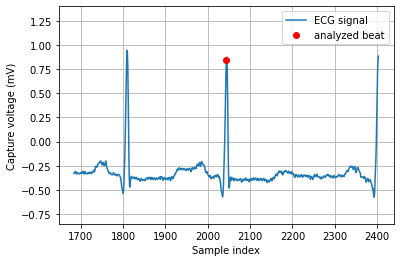

In [ ]:
#Print do batimento com PAC
ecg = p_signal[:,0]

x = np.arange(len(ecg))

inicio = sampleA[0] - 360
fim = sampleA[0] + 360



amostra = ecg[inicio:fim]

plt.plot(x[inicio:fim],ecg[inicio:fim],'-',label='ECG signal')
plt.plot(x[sampleA[0]],ecg[sampleA[0]],'ro',label='analyzed beat')
#plt.title('Batimento atrial prematuro')
plt.ylabel('Capture voltage (mV)')
plt.xlabel('Sample index')
plt.ylim([-0.85,1.4])
plt.legend(loc='best')
plt.grid()
plt.savefig('pac.png', dpi=200)
plt.show()


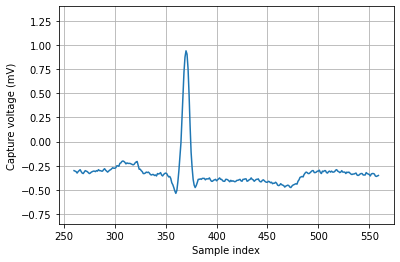

In [ ]:
#Print do batimento normal
ecg = p_signal[:,0]

x = np.arange(len(ecg))

inicio = sampleN[1] - 110
fim = sampleN[1] + 190



amostra = ecg[inicio:fim]

# plt.plot(x[inicio:fim],ecg[inicio:fim],'-',label='sinal do ecg')
# plt.plot(x[sampleN[1]],ecg[sampleN[1]],'ro',label='batimento sob análise')
#plt.title('Batimento normal')
plt.plot(x[inicio:fim],ecg[inicio:fim],'-')
plt.ylabel('Capture voltage (mV)')
plt.xlabel('Sample index')

plt.ylim([-0.85,1.4])

#plt.legend(loc='upper right')
plt.grid()
plt.savefig('normal.png', dpi=200)
plt.show()


# Base de dados

In [ ]:
# Caminho onde os arquivos da base de dados estão armazenados
path = "/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/"

# Cria um dataframe com os nomes dos arquivos
rec = pd.read_csv(path + "RECORDS", names=["n"], dtype=str)

# Lista de nonbeats e abnormal
nonbeat = ['[', '!', ']', 'x', '(', ')', 'p', 't', '`', 'u', '\\', '^', '|', '~', '+', 's', 'T', '*', 'D', '=', '"', '@', 'Q', '?']
#abnormal = ['L', 'R', 'V', '/', 'A', 'f', 'F', 'j', 'a', 'E', 'J', 'e', 'S']
abnormal = {'V', 'A'}

num_sec = 1
fs = 360
paciente_both = []
paciente_any = []
paciente_vpc = []
paciente_apc = []


for pt in rec.n:
  file = path + pt
  # Leitura e armazenamento das anotações
  annotation = wfdb.rdann(file, "atr")
  #Extrai os símbolos e anotações
  atr_sym = annotation.symbol
  atr_sample = annotation.sample

  atr_sym_set = set(atr_sym)

  if atr_sym_set.issuperset(abnormal):
    paciente_both.append(pt)

  if atr_sym_set.intersection(abnormal):
    paciente_any.append(pt)

  abnormal = list(abnormal)

  if abnormal[0] in atr_sym_set:
    paciente_vpc.append(pt)

  if abnormal[1] in atr_sym_set:
    paciente_apc.append(pt)

print("Número de pacientes com as duas arritmias: {}".format(len(paciente_both)))
print("Pacientes com as duas arritmias: {}".format(paciente_both))
print("Número de pacientes com pelo menos uma das arritmias: {}".format(len(paciente_any)))
print("Pacientes com pelo menos uma das arritmias: {}".format(paciente_any))
print("Número de pacientes com VPC: {}".format(len(paciente_vpc)))
print("Pacientes com VPC: {}".format(paciente_vpc))
print("Número de pacientes com APC: {}".format(len(paciente_apc)))
print("Pacientes com APC: {}".format(paciente_apc))

  

Número de pacientes com as duas arritmias: 20
Pacientes com as duas arritmias: ['100', '108', '114', '116', '118', '121', '124', '200', '201', '202', '205', '207', '209', '213', '215', '219', '223', '228', '231', '233']
Número de pacientes com pelo menos uma das arritmias: 44
Pacientes com pelo menos uma das arritmias: ['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '114', '116', '117', '118', '119', '121', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
Número de pacientes com VPC: 37
Pacientes com VPC: ['100', '102', '104', '105', '106', '107', '108', '109', '111', '114', '116', '118', '119', '121', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '213', '214', '215', '217', '219', '221', '223', '228', '230', '231', '233', '234']
Número de pacientes com APC: 27
Pacientes com APC: ['100', 

In [ ]:
# Caminho onde os arquivos da base de dados estão armazenados
path = "/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/"

# Cria um dataframe com os nomes dos arquivos
rec = pd.read_csv(path + "RECORDS", names=['n'], dtype=str)

# Lista de nonbeats e abnormal
nonbeat = ['[', '!', ']', 'x', '(', ')', 'p', 't', '`', 'u', '\\', '^', '|', '~', '+', 's', 'T', '*', 'D', '=', '"', '@', 'Q', '?']
#abnormal = ['L', 'R', 'V', '/', 'A', 'f', 'F', 'j', 'a', 'E', 'J', 'e', 'S']
abnormal = ['V', 'A']

num_sec = 1
fs = 360

#Inicilaiza os vetores
num_cols = 2 * num_sec * fs #numero de colunas que vai armazenar um amostra 
X_all = np.zeros((1, num_cols)) #Cria um vetor com numero de elementos igual a num_cols e preenche com zeros 
Y_all = np.zeros((1, 1)) #cria um vetor com com um elemento e preenche com zero
sym_all = []

#Lista para controlar o número de batimentos de cada paciente
max_rows = []

for pt in rec.n:
  file = path + pt
  p_signal, atr_sym, atr_sample = load_ecg(file)
  
  if 'A' and 'V' in atr_sym:
    #Seleciona o sinal MLII
    p_signal = p_signal[:, 0]
    # p_signal = filtering.remove_baseline_wander(p_signal, fs, cutoff=0.05) # remove the baseline wandering

    # Cria um df para excluir o que mão é um batimento
    df_ann = pd.DataFrame({'atr_sym': atr_sym,
                          'atr_sample': atr_sample})
    df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal + ['N'])]
    #df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal)]
   

    X, Y, sym = build_XY(p_signal, df_ann, num_cols, abnormal, num_sec, fs)
    sym_all = sym_all + sym
    max_rows.append(X.shape[0])
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

#Exclui a primeira linha que é formada por zeros
X_all = X_all[1:, :]
Y_all = Y_all[1:, :]

#Verifica se os tamanhos das matrizes fazem sentido
assert np.sum(max_rows) == X_all.shape[0], 'number of X, max_rows rows messed up'
assert Y_all.shape[0] == X_all.shape[0], 'number of X, Y rows messed up'
assert Y_all.shape[0] == len(sym_all), 'number of Y, sym rows messed up'

joblib.dump(X_all, 'X_all.joblib')
joblib.dump(Y_all, 'Y_all.joblib')

d = {x:np.count_nonzero(Y_all == x) for x in [0,1]} #Calcula quantas amostras cada classe possui 0 -> Normal, 1 -> Arritmia

print(d)
print(len(X_all)) #Quantidade total de amostras


{0: 55820, 1: 7979}
63799


Perform class balancing using downscale.

In [ ]:
import random
n = 55820 - 7979

idx = [i for i,y in enumerate(Y_all) if y==0]
to_delete = set(random.sample(idx,n))

X_balanced = np.array([x for i,x in enumerate(X_all) if not i in to_delete])
Y_balanced = np.array([y for i,y in enumerate(Y_all) if not i in to_delete])

d = {x:np.count_nonzero(Y_balanced == x) for x in [0,1]} #Calcula quantas amostras cada classe possui 0 -> Normal, 1 -> Arritmia

print(d)

{0: 7979, 1: 7979}


# Classificação

## BIBLIOTECAS E FUNCOES

In [ ]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, svm, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
def metricas(grid, X_test, y_test):
  # predict probabilities for test set
  yhat = grid.predict(X_test)

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat)
  print('F1 score: %f' % f1)

  # kappa
  kappa = cohen_kappa_score(y_test, yhat)
  print('Cohens kappa: %f' % kappa)
  # ROC AUC
  # auc = roc_auc_score(y_test, yhat_probs)
  # print('ROC AUC: %f' % auc)
  # confusion matrix
  matrix = confusion_matrix(y_test, yhat)
  print(matrix)

In [ ]:
''' Tratamento dos dados '''

#Executa o escalonamento dos dados
scaler = StandardScaler()
scaler.fit(X_all)
X = scaler.transform(X_all)
Y = np.ravel(Y_all)
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.1)

##RANDOM FORESTS

In [ ]:
''' Random Forest '''

#Busca em grade para identificar os melhores valores para os parâmetros max_depth
#e n_estimators

depth_range = range(20,31,5)
n_estimators_range = range(80, 101, 10)
param_grid = dict(max_depth=depth_range, n_estimators=n_estimators_range)
cv = KFold(n_splits=3, shuffle=True, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv, scoring=['accuracy','precision', 'recall', 'roc_auc'], refit='roc_auc', verbose=3)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END max_depth=20, n_estimators=80; accuracy: (test=0.985) precision: (test=0.990) recall: (test=0.892) roc_auc: (test=0.989) total time= 1.1min
[CV 2/3] END max_depth=20, n_estimators=80; accuracy: (test=0.986) precision: (test=0.990) recall: (test=0.895) roc_auc: (test=0.988) total time= 1.1min
[CV 3/3] END max_depth=20, n_estimators=80; accuracy: (test=0.985) precision: (test=0.991) recall: (test=0.886) roc_auc: (test=0.986) total time= 1.2min
[CV 1/3] END max_depth=20, n_estimators=90; accuracy: (test=0.986) precision: (test=0.987) recall: (test=0.898) roc_auc: (test=0.991) total time= 1.3min
[CV 2/3] END max_depth=20, n_estimators=90; accuracy: (test=0.985) precision: (test=0.987) recall: (test=0.895) roc_auc: (test=0.988) total time= 1.3min
[CV 3/3] END max_depth=20, n_estimators=90; accuracy: (test=0.985) precision: (test=0.990) recall: (test=0.892) roc_auc: (test=0.989) total time= 1.3min
[CV 1/3] END max_depth

In [ ]:
import joblib
randomforests_results = grid.cv_results_
joblib.dump(randomforests_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/randomforests_results.joblib")

In [ ]:
metricas(grid, X_test,y_test)

In [ ]:
clf = RandomForestClassifier(max_depth= 30, n_estimators= 80)
clf.fit(X_train, y_train)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.014 seconds


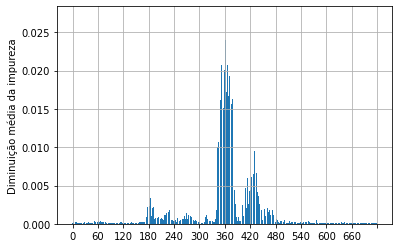

In [ ]:
import pandas as pd

feature_names = [f'{i}' for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
plt.bar(feature_names,importances)
# plt.title("Importância dos parâmetros")
plt.ylabel("Diminuição média da impureza")
plt.xticks(range(0,721,60))
plt.grid()
#fig.tight_layout()
plt.savefig('featureimportance.png', dpi=300)

##SVM

In [ ]:
C_range = [0.1, 1, 1.5]
kernel_range = ['linear', 'rbf']


x_fold =
y_fold = 
clf = svm.SVC(C=c, kernel=kernel)
grid = clf.fit(x_fold, yfold)



In [ ]:
clf = svm.SVC()
clf.fit(X_train, y_train)

In [ ]:
metricas(clf,X_test, y_test)

Accuracy: 0.990596
Precision: 0.994460
Recall: 0.927649
F1 score: 0.959893
Cohens kappa: 0.954574
[[5602    4]
 [  56  718]]


In [ ]:
''' SVM '''

#Busca em grade para identificar os melhores valores para os parâmetros C e gamma

C_range = [0.1, 1, 1.5]
kernel_range = ['linear', 'rbf']
param_grid = dict(kernel=kernel_range, C=C_range)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, verbose=3)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
import joblib
svm_results = grid.cv_results_
joblib.dump(svm_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/svm_results.joblib")

In [ ]:
metricas(grid, X_test,y_test)

##KNN

In [ ]:
'''KNN'''

n_neighbors_range = range(4,7)
weights_range = ['uniform', 'distance']
param_grid = dict(n_neighbors=n_neighbors_range, weights=weights_range)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
import joblib
knn_results = grid.cv_results_
joblib.dump(knn_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/knn_results.joblib")

In [ ]:
metricas(grid, X_test,y_test)

## Regressão Logística

In [ ]:
'''LogisticRegression'''

penalty_range = ['l1', 'l2']
class_weight_range = ['balanced', None]
param_grid = dict(penalty=penalty_range, class_weight=class_weight_range)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

In [ ]:
import joblib
rl_results = grid.cv_results_
joblib.dump(rl_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/rl_results.joblib")

['/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/rl_results.joblib']

In [ ]:
metricas(grid, X_test,y_test)

Accuracy: 0.946708
Precision: 0.852124
Recall: 0.687685
F1 score: 0.761124
Cohens kappa: 0.731517
[[16495   282]
 [  738  1625]]


## ADABOOST

In [ ]:
''' Adaboost '''

#Busca em grade para identificar os melhores valores para os parâmetros max_depth
#e n_estimators

n_estimators_range = range(80, 101, 10)
learning_rate_range = [0.001,0.01,0.1,1]
param_grid = dict(learning_rate=learning_rate_range, n_estimators=n_estimators_range)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Os melhores parâmetros são {'learning_rate': 1, 'n_estimators': 100} com um score de 0.97


In [ ]:
import joblib
adaboost_results = grid.cv_results_
joblib.dump(adaboost_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/adaboost_results.joblib")

['/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/adaboost_results.joblib']

## Redes Neurais

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

learning_rate_init = [0.001,0.01,0.1]
hidden_layer_sizes = [30,35,40]
# batch_size = [10, 20, 40, 60, 80, 100]

param_grid = dict(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init)
grid = GridSearchCV(estimator=MLPClassifier(early_stopping=True), 
                    param_grid=param_grid, n_jobs=-1,
                    cv=10)

grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Os melhores parâmetros são {'hidden_layer_sizes': 35, 'learning_rate_init': 0.1} com um score de 0.93


In [ ]:
import joblib
mlp_results = grid.cv_results_
joblib.dump(mlp_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/mlp_results.joblib")

['/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/mlp_results.joblib']

In [ ]:
clf = grid.best_estimator_

In [ ]:
clf.n_iter_

22

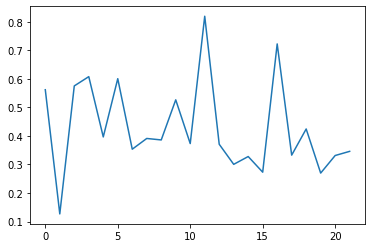

In [ ]:
#!pip install matplotlib==3.1.1
y = clf.loss_curve_
plt.plot(range(len(y)),y)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3)

#neuronios = [5,10,15,20,25,30,35]
neuronios = [10,15,20,25,30]
lr = [0.0001,0.001,0.01]
acuracia = pd.DataFrame(columns=['neuronios', 'lr', 'acuracia_treino', 'acuracia_teste'])

for n in neuronios:
  for l in lr:
    # create model
    model = Sequential()
    model.add(Dense(n, input_dim=X_train.shape[1], activation='relu',activity_regularizer=regularizers.l2(0.001)))
    model.add(Dropout(rate=0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    opt = SGD(learning_rate=l)
    #opt = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # simple early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

    #Dado que o número de amostras de batimentos normais é 7 vezes maior do que anormais, foi utilizado o balancemaneto das classes
    class_weight = {0: 1.,
                    1: 7.}

    # Fit the model
    history = model.fit(X_all, Y_all, validation_split=0.3, epochs=500, batch_size=32, class_weight=class_weight, verbose=0, callbacks=[es])
    #history = model.fit(X_all, Y_all, validation_split=0.3, epochs=500, batch_size=32, verbose=0, callbacks=[es, mc])

    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)

    acuracia['neuronio'] = n
    acuracia ['lr'] = l
    acuracia['acuracia_treino'] = train_acc
    acuracia['acuracia_teste'] = test_acc

acuracia.head()
    

Epoch 00162: early stopping
Epoch 00072: early stopping
Epoch 00021: early stopping
Epoch 00289: early stopping
Epoch 00074: early stopping
Epoch 00027: early stopping
Epoch 00289: early stopping
Epoch 00101: early stopping
Epoch 00035: early stopping


,neuronios,lr,acuracia_treino,acuracia_teste,neuronio


In [ ]:
acuracia.head()

,neuronios,lr,acuracia_treino,acuracia_teste,neuronio


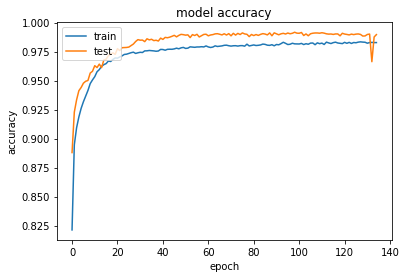

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

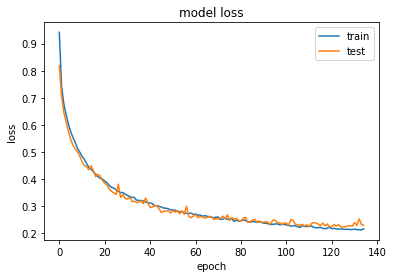

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)


# The predictions are returned in a two-dimensional array, with one row for each example in the test dataset and one column for the prediction.
# The scikit-learn metrics API expects a 1D array of actual and predicted values for comparison, therefore, we must reduce the 2D prediction arrays to 1D arrays
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)



Accuracy: 0.988088
Precision: 0.937550
Recall: 0.970174
F1 score: 0.953583
Cohens kappa: 0.946752
ROC AUC: 0.997305
[[16570   156]
 [   72  2342]]


## Gradient Boost

In [ ]:
''' GradienteBoost '''

#Busca em grade para identificar os melhores valores para os parâmetros max_depth
#e n_estimators

n_estimators_range = range(80, 101, 10)
learning_rate_range = [0.001,0.01,0.1,1]
param_grid = dict(learning_rate=learning_rate_range, n_estimators=n_estimators_range)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

## Decision Tree

In [ ]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

param_grid = dict(criterion=criterion, splitter=splitter)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
grid.fit(X, Y)


print("Os melhores parâmetros são %s com um score de %0.2f"
      % (grid.best_params_, grid.best_score_))

Os melhores parâmetros são {'criterion': 'entropy', 'splitter': 'random'} com um score de 0.98


In [ ]:
import joblib
decisiontree_results = grid.cv_results_
joblib.dump(decisiontree_results,"/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/decisiontree_results.joblib")

['/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/decisiontree_results.joblib']

# Significância estatística

## Bibliotecas

In [ ]:
! pip uninstall scikit-learn
! pip install scikit-learn==0.19.2

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-1.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-1.0.2
     |████████████████████████████████| 4.9 MB 5.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires scikit-learn>=0.20, but you have scikit-learn 0.19.2 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.19.2 which is incompatible.


In [ ]:
import joblib
import sklearn
import pandas as pd
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## SVM

In [ ]:
svm_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/svm_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_svm_results = pd.DataFrame(data=svm_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_svm = df_svm_results[df_svm_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_svm = df_svm_results[['params','mean_test_score','std_test_score']]
grid_search_svm.head(12)

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'kernel': 'sigmoid'}",0.872960,0.003997
1,"{'C': 0.1, 'kernel': 'rbf'}",0.976551,0.001368
2,"{'C': 1, 'kernel': 'sigmoid'}",0.864026,0.003837
3,"{'C': 1, 'kernel': 'rbf'}",0.988088,0.001520
4,"{'C': 1.5, 'kernel': 'sigmoid'}",0.863603,0.003709
5,"{'C': 1.5, 'kernel': 'rbf'}",0.989106,0.001474


## Adaboost

In [ ]:
adaboost_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/adaboost_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_adaboost_results = pd.DataFrame(data=adaboost_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_adaboost = df_adaboost_results[df_adaboost_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_adaboost = df_adaboost_results[['params','rank_test_score','mean_test_score','std_test_score']]
grid_search_adaboost.head(20)

,params,rank_test_score,mean_test_score,std_test_score
0,"{'learning_rate': 0.001, 'n_estimators': 80}",7,0.906409,0.004214
1,"{'learning_rate': 0.001, 'n_estimators': 90}",9,0.904889,0.003438
2,"{'learning_rate': 0.001, 'n_estimators': 100}",8,0.904920,0.003434
3,"{'learning_rate': 0.01, 'n_estimators': 80}",12,0.894027,0.004822
4,"{'learning_rate': 0.01, 'n_estimators': 90}",11,0.894058,0.004785
5,"{'learning_rate': 0.01, 'n_estimators': 100}",10,0.894152,0.004803
6,"{'learning_rate': 0.1, 'n_estimators': 80}",6,0.941958,0.002755
7,"{'learning_rate': 0.1, 'n_estimators': 90}",5,0.943635,0.002983
8,"{'learning_rate': 0.1, 'n_estimators': 100}",4,0.945156,0.002675
9,"{'learning_rate': 1, 'n_estimators': 80}",3,0.968871,0.001541


## KNN

In [ ]:
knn_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/knn_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_knn_results = pd.DataFrame(data=knn_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_knn = df_knn_results[df_knn_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_knn = df_knn_results[['params','rank_test_score','mean_test_score','std_test_score']]
grid_search_knn.head(20)

,params,rank_test_score,mean_test_score,std_test_score
0,"{'n_neighbors': 4, 'weights': 'uniform'}",5,0.984232,0.001727
1,"{'n_neighbors': 4, 'weights': 'distance'}",1,0.986003,0.001741
2,"{'n_neighbors': 5, 'weights': 'uniform'}",4,0.984483,0.001591
3,"{'n_neighbors': 5, 'weights': 'distance'}",3,0.984577,0.001530
4,"{'n_neighbors': 6, 'weights': 'uniform'}",6,0.982899,0.001381
5,"{'n_neighbors': 6, 'weights': 'distance'}",2,0.984780,0.001668


## Random Forests

In [ ]:
randomforests_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/randomforests_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_randomforests_results = pd.DataFrame(data=randomforests_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_randomforests = df_randomforests_results[df_randomforests_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_randomforests = df_randomforests_results[['params', 'rank_test_score','mean_test_score','std_test_score']]
grid_search_randomforests

,params,rank_test_score,mean_test_score,std_test_score
0,"{'max_depth': 20, 'n_estimators': 80}",7,0.985721,0.000947
1,"{'max_depth': 20, 'n_estimators': 90}",9,0.985564,0.000593
2,"{'max_depth': 20, 'n_estimators': 100}",8,0.985611,0.000711
3,"{'max_depth': 25, 'n_estimators': 80}",6,0.986849,0.000710
4,"{'max_depth': 25, 'n_estimators': 90}",5,0.986912,0.000640
5,"{'max_depth': 25, 'n_estimators': 100}",4,0.987022,0.000569
6,"{'max_depth': 30, 'n_estimators': 80}",1,0.987947,0.000706
7,"{'max_depth': 30, 'n_estimators': 90}",2,0.987711,0.000549
8,"{'max_depth': 30, 'n_estimators': 100}",3,0.987649,0.000419


## Regressão Logística

In [ ]:
rl_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/lr_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_rl_results = pd.DataFrame(data=rl_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_rl = df_rl_results[df_rl_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_rl = df_rl_results[['params', 'rank_test_score','mean_test_score','std_test_score']]
grid_search_rl

,params,rank_test_score,mean_test_score,std_test_score
0,"{'class_weight': 'balanced', 'penalty': 'l1'}",3,0.911017,0.003494
1,"{'class_weight': 'balanced', 'penalty': 'l2'}",4,0.910688,0.003360
2,"{'class_weight': None, 'penalty': 'l1'}",1,0.947382,0.002053
3,"{'class_weight': None, 'penalty': 'l2'}",2,0.947005,0.002226


## MLP

In [ ]:
mlp_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/mlp_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_mlp_results = pd.DataFrame(data=mlp_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_mlp = df_mlp_results[df_mlp_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_mlp = df_mlp_results[['params', 'rank_test_score','mean_test_score','std_test_score']]
grid_search_mlp

## Gradient Boosting

In [ ]:
gboost_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/gboost_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_gboost_results = pd.DataFrame(data=gboost_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_gboost = df_gboost_results[df_gboost_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_gboost = df_gboost_results[['params','rank_test_score','mean_test_score','std_test_score']]
grid_search_gboost

,params,rank_test_score,mean_test_score,std_test_score
0,"{'learning_rate': 0.001, 'n_estimators': 80}",10,0.874935,0.004475
1,"{'learning_rate': 0.001, 'n_estimators': 90}",10,0.874935,0.004475
2,"{'learning_rate': 0.001, 'n_estimators': 100}",10,0.874935,0.004475
3,"{'learning_rate': 0.01, 'n_estimators': 80}",9,0.940454,0.003092
4,"{'learning_rate': 0.01, 'n_estimators': 90}",8,0.944623,0.003341
5,"{'learning_rate': 0.01, 'n_estimators': 100}",7,0.946661,0.003252
6,"{'learning_rate': 0.1, 'n_estimators': 80}",3,0.979435,0.001704
7,"{'learning_rate': 0.1, 'n_estimators': 90}",2,0.980329,0.001552
8,"{'learning_rate': 0.1, 'n_estimators': 100}",1,0.981175,0.001559
9,"{'learning_rate': 1, 'n_estimators': 80}",5,0.975125,0.005346


## Decision Tree

In [ ]:
decisiontree_results = joblib.load('/content/drive/MyDrive/Bases de dados/mit-bih-arrhythmia-database-1.0.0/decisiontree_results.joblib')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_decisiontree_results = pd.DataFrame(data=decisiontree_results)

In [ ]:
# Resultados dos testes dos 10 folds para a melhor configuração
best_decisiontree = df_decisiontree_results[df_decisiontree_results['rank_test_score']==1].loc[:,'split0_test_score':'split9_test_score'].to_numpy()[0]

In [ ]:
grid_search_decisiontree = df_decisiontree_results[['params', 'rank_test_score', 'mean_test_score','std_test_score']]
grid_search_decisiontree.head(20)

,params,rank_test_score,mean_test_score,std_test_score
0,"{'criterion': 'gini', 'splitter': 'best'}",4,0.978448,0.001643
1,"{'criterion': 'gini', 'splitter': 'random'}",3,0.979639,0.001125
2,"{'criterion': 'entropy', 'splitter': 'best'}",2,0.980595,0.001203
3,"{'criterion': 'entropy', 'splitter': 'random'}",1,0.980846,0.001191


## Friedman Test

In [ ]:
results = [best_svm, best_rl, best_randomforests, best_mlp, best_knn, best_gboost, best_decisiontree, best_adaboost]
statistic, pvalue = friedmanchisquare(*results)

In [ ]:
print('statistic = {:.2f} e pvalue = {}'.format(statistic,pvalue))

statistic = 58.36 e pvalue = 3.2039354726199315e-10


In [ ]:
import csv
with open('results.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile)
    spamwriter.writerows(results)

In [ ]:
from scipy.stats import f_oneway


f_oneway(best_svm, best_rl, best_randomforests, best_mlp, best_knn, best_gboost, best_decisiontree, best_adaboost)

F_onewayResult(statistic=5.849189520880461, pvalue=2.146556250097347e-05)

In [ ]:
df = pd.DataFrame({'acuracia':np.array(results).reshape(80),
                   'modelo':np.repeat(['svm', 'logistic_regression', 
                                       'random_forests', 'mlp', 'knn', 
                                       'gradient_boosting', 'decision_tree', 
                                       'adaboost'], repeats=10)})

tukey = pairwise_tukeyhsd(endog=df['acuracia'], groups=df['modelo'], alpha=0.05)

print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
           adaboost       decision_tree   0.0099    0.9 -0.0289  0.0488  False
           adaboost   gradient_boosting   0.0103    0.9 -0.0286  0.0492  False
           adaboost                 knn   0.0151    0.9 -0.0238   0.054  False
           adaboost logistic_regression  -0.0235 0.5546 -0.0624  0.0154  False
           adaboost                 mlp  -0.0397  0.042 -0.0786 -0.0008   True
           adaboost      random_forests    0.017 0.8576 -0.0218  0.0559  False
           adaboost                 svm   0.0182 0.8034 -0.0207  0.0571  False
      decision_tree   gradient_boosting   0.0003    0.9 -0.0386  0.0392  False
      decision_tree                 knn   0.0052    0.9 -0.0337   0.044  False
      decision_tree logistic_regression  -0.0335 0.1

In [ ]:
! pip install scikit-posthocs

     |████████████████████████████████| 43 kB 970 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37902 sha256=13bfb408933c7fa414685b5b5ea228094f3717f429aebbc14c58c501dad6a6aa
  Stored in directory: /root/.cache/pip/wheels/b8/21/e6/f39794d4a6ee3d3cc5146ca80b5cd949452ad4a8fde9f6b9fc
Successfully built scikit-posthocs


In [ ]:
import scikit_posthocs as sp
df = pd.DataFrame({'acuracia':np.array(results).reshape(80),
                   'modelo':np.repeat(['svm', 'logistic_regression', 
                                       'random_forests', 'mlp', 'knn', 
                                       'gradient_boosting', 'decision_tree', 
                                       'adaboost'], repeats=10),
                  'fold':[1,2,3,4,5,6,7,8,9,10]*8})

In [ ]:
sp.posthoc_nemenyi_friedman(df,y_col='acuracia',block_col='fold',group_col='modelo', melted=True)

,svm,logistic_regression,random_forests,mlp,knn,gradient_boosting,decision_tree,adaboost
svm,1.000000,0.001000,0.900000,0.001000,0.669771,0.035044,0.035044,0.001000
logistic_regression,0.001000,1.000000,0.001000,0.860792,0.001000,0.111334,0.111334,0.900000
random_forests,0.900000,0.001000,1.000000,0.003784,0.900000,0.231913,0.231913,0.002647
mlp,0.001000,0.860792,0.003784,1.000000,0.087503,0.860792,0.860792,0.900000
knn,0.669771,0.001000,0.900000,0.087503,1.000000,0.806216,0.806216,0.068652
gradient_boosting,0.035044,0.111334,0.231913,0.860792,0.806216,1.000000,0.900000,0.806216
decision_tree,0.035044,0.111334,0.231913,0.860792,0.806216,0.900000,1.000000,0.806216
adaboost,0.001000,0.900000,0.002647,0.900000,0.068652,0.806216,0.806216,1.000000


In [ ]:
np.mean(results, axis=1)

array([0.98910639, 0.94738163, 0.9879465 , 0.93120683, 0.98600291,
       0.98117525, 0.98084608, 0.97090863])

# Dealing with unbalanced data

In [ ]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing, svm, metrics
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
def metricas(clf, X_test, y_test):
  # predict probabilities for test set
  yhat = clf.predict(X_test)

  # accuracy: (tp + tn) / (p + n)
  accuracy = accuracy_score(y_test, yhat)
  print('Accuracy: %f' % accuracy)
  # precision tp / (tp + fp)
  precision = precision_score(y_test, yhat)
  print('Precision: %f' % precision)
  # recall: tp / (tp + fn)
  recall = recall_score(y_test, yhat)
  print('Recall: %f' % recall)
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_test, yhat)
  print('F1 score: %f' % f1)

  # kappa
  kappa = cohen_kappa_score(y_test, yhat)
  print('Cohens kappa: %f' % kappa)
  # ROC AUC
  # auc = roc_auc_score(y_test, yhat_probs)
  # print('ROC AUC: %f' % auc)
  # confusion matrix
  matrix = confusion_matrix(y_test, yhat)
  print(matrix)

In [ ]:
'''Random Forests - unbalanced data'''
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=80, max_depth=30)
clf.fit(X_train, y_train.ravel())
metricas(clf, X_test, y_test)

Accuracy: 0.987409
Precision: 0.988972
Recall: 0.912124
F1 score: 0.948995
Cohens kappa: 0.941826
[[16657    25]
 [  216  2242]]


In [ ]:
'''Random Forests - balanced data'''
X_train, X_test, y_train, y_test = train_test_split(X_balanced, Y_balanced, test_size=0.3, random_state=42)
clf = RandomForestClassifier(n_estimators=80, max_depth=30)
clf.fit(X_train, y_train.ravel())
metricas(clf, X_test, y_test)

Accuracy: 0.972640
Precision: 0.984681
Recall: 0.960565
F1 score: 0.972473
Cohens kappa: 0.945286
[[2343   36]
 [  95 2314]]
